In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy import sin,cos,pi
plt.style.use('seaborn')

from imu_tracking import IMUTracking

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/lift 1m.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016083C77508>,
      dtype=object)

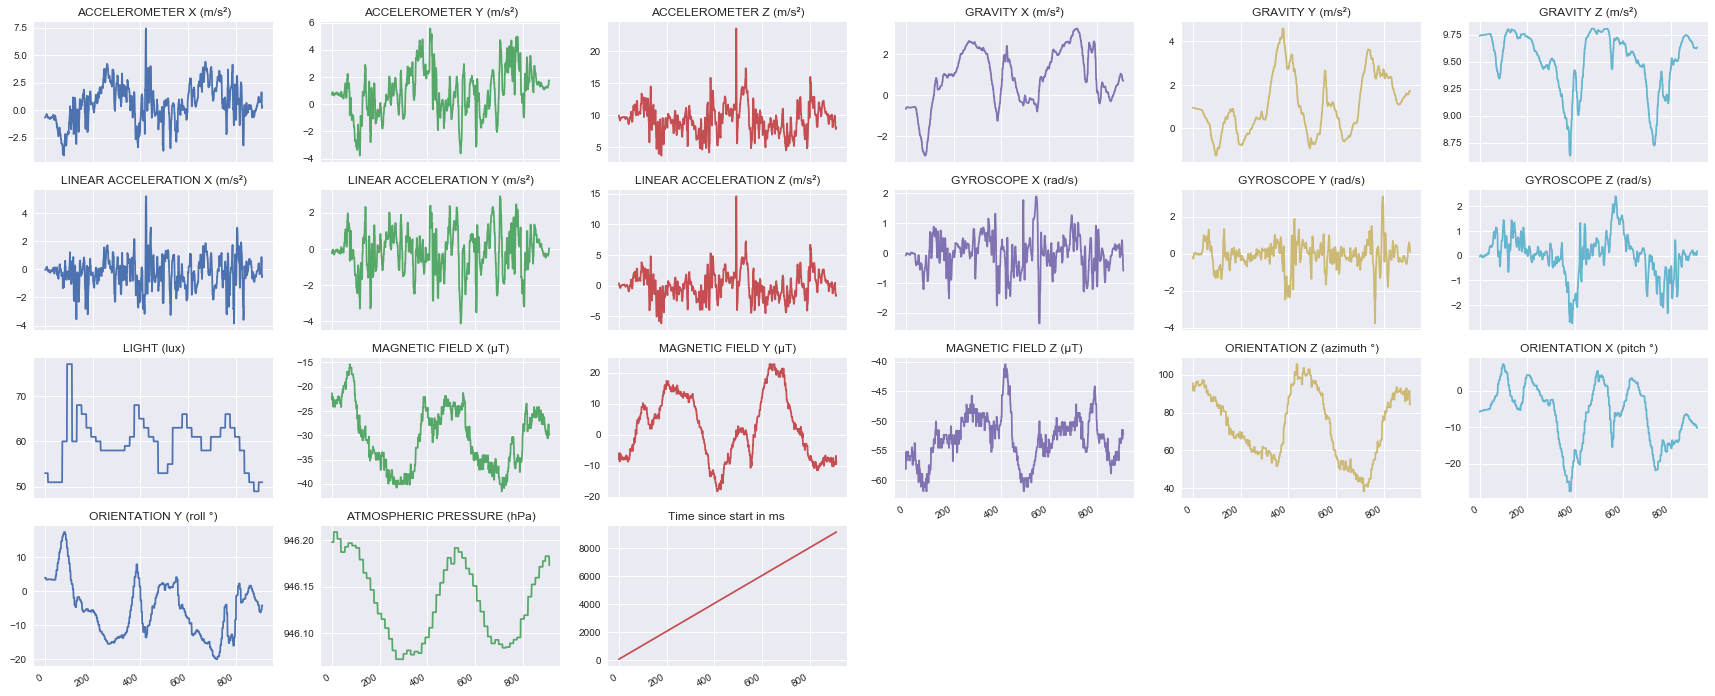

In [3]:
df.plot(subplots=True, sharex=True, figsize=(30, 20),  layout=(6,6), title=list(df.columns[:-1]), legend=False)

In [4]:
cols_angles = ['ORIENTATION X (pitch °)', 'ORIENTATION Y (roll °)', 'ORIENTATION Z (azimuth °)']
for axis in cols_angles:
    df[axis] = df[axis] * pi/180

In [5]:
df

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),...,LIGHT (lux),MAGNETIC FIELD X (μT),MAGNETIC FIELD Y (μT),MAGNETIC FIELD Z (μT),ORIENTATION Z (azimuth °),ORIENTATION X (pitch °),ORIENTATION Y (roll °),ATMOSPHERIC PRESSURE (hPa),Time since start in ms,YYYY-MO-DD HH-MI-SS_SSS
0,-0.693924,0.677170,9.975677,-0.669051,0.954234,9.737155,-0.027570,-0.253423,0.388120,-0.085693,...,53.0,-21.3211,-7.9895,-58.1161,1.668648,-0.100273,0.069482,946.1980,58,2019-11-30 14:32:55:225
1,-0.629318,0.839874,9.662216,-0.622046,0.943472,9.741319,-0.034310,-0.122092,0.123142,-0.028290,...,53.0,-22.6974,-6.0074,-55.1880,1.600200,-0.097459,0.068604,946.1980,68,2019-11-30 14:32:55:235
2,-0.629318,0.839874,9.662216,-0.622046,0.943472,9.741319,-0.034310,-0.122092,0.123142,-0.028290,...,53.0,-22.6974,-6.0074,-55.1880,1.600200,-0.097459,0.068604,946.1980,77,2019-11-30 14:32:55:244
3,-0.612564,0.868591,9.379868,-0.591577,0.942521,9.743309,-0.035641,-0.064888,-0.211035,-0.012405,...,53.0,-22.0505,-8.6868,-56.6452,1.600200,-0.097459,0.068604,946.1980,87,2019-11-30 14:32:55:254
4,-0.583847,0.878159,9.181259,-0.578363,0.943264,9.744031,-0.015216,-0.042822,-0.358101,0.003464,...,53.0,-22.0505,-8.6868,-56.6452,1.600200,-0.097459,0.068604,946.1980,98,2019-11-30 14:32:55:265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,1.629517,1.395020,8.212174,0.787046,1.731958,9.620357,0.867188,-0.275859,-1.191832,0.319901,...,51.0,-27.7618,-9.5093,-52.9694,1.597858,-0.168154,-0.095490,946.1829,9148,2019-11-30 14:33:04:315
909,1.629517,1.395020,8.212174,0.787046,1.731958,9.620357,0.867188,-0.275859,-1.191832,-0.047852,...,51.0,-27.7618,-9.5093,-52.9694,1.597858,-0.168154,-0.095490,946.1829,9149,2019-11-30 14:33:04:316
910,0.189026,1.706085,7.831711,0.707319,1.728101,9.627240,-0.559812,-0.069562,-1.717956,-0.047852,...,51.0,-29.8340,-6.8604,-51.5167,1.470194,-0.177142,-0.073339,946.1829,9158,2019-11-30 14:33:04:325
911,0.346954,1.737183,8.068604,0.698048,1.710787,9.631009,-0.458410,0.036393,-1.612025,-0.404572,...,51.0,-29.8340,-6.8604,-51.5167,1.470194,-0.177142,-0.073339,946.1829,9167,2019-11-30 14:33:04:334


In [6]:
data_new = pd.DataFrame()
data_new[0] = df.iloc[:, 6]
data_new[1] = df.iloc[:, 7]
data_new[2] = df.iloc[:, 8]
data_new[3] = df.iloc[:, 17]
data_new[4] = df.iloc[:, 18]
data_new[5] = df.iloc[:, 16]

In [7]:
data_new

,0,1,2,3,4,5
0,-0.027570,-0.253423,0.388120,-0.100273,0.069482,1.668648
1,-0.034310,-0.122092,0.123142,-0.097459,0.068604,1.600200
2,-0.034310,-0.122092,0.123142,-0.097459,0.068604,1.600200
3,-0.035641,-0.064888,-0.211035,-0.097459,0.068604,1.600200
4,-0.015216,-0.042822,-0.358101,-0.097459,0.068604,1.600200
...,...,...,...,...,...,...
908,0.867188,-0.275859,-1.191832,-0.168154,-0.095490,1.597858
909,0.867188,-0.275859,-1.191832,-0.168154,-0.095490,1.597858
910,-0.559812,-0.069562,-1.717956,-0.177142,-0.073339,1.470194
911,-0.458410,0.036393,-1.612025,-0.177142,-0.073339,1.470194


In [8]:
data = pd.DataFrame()
imu_tracking = IMUTracking(data, 0.01)

for i in range (len(data_new)):
    imu_tracking.data_add(data_new.iloc[i, :].astype(float))

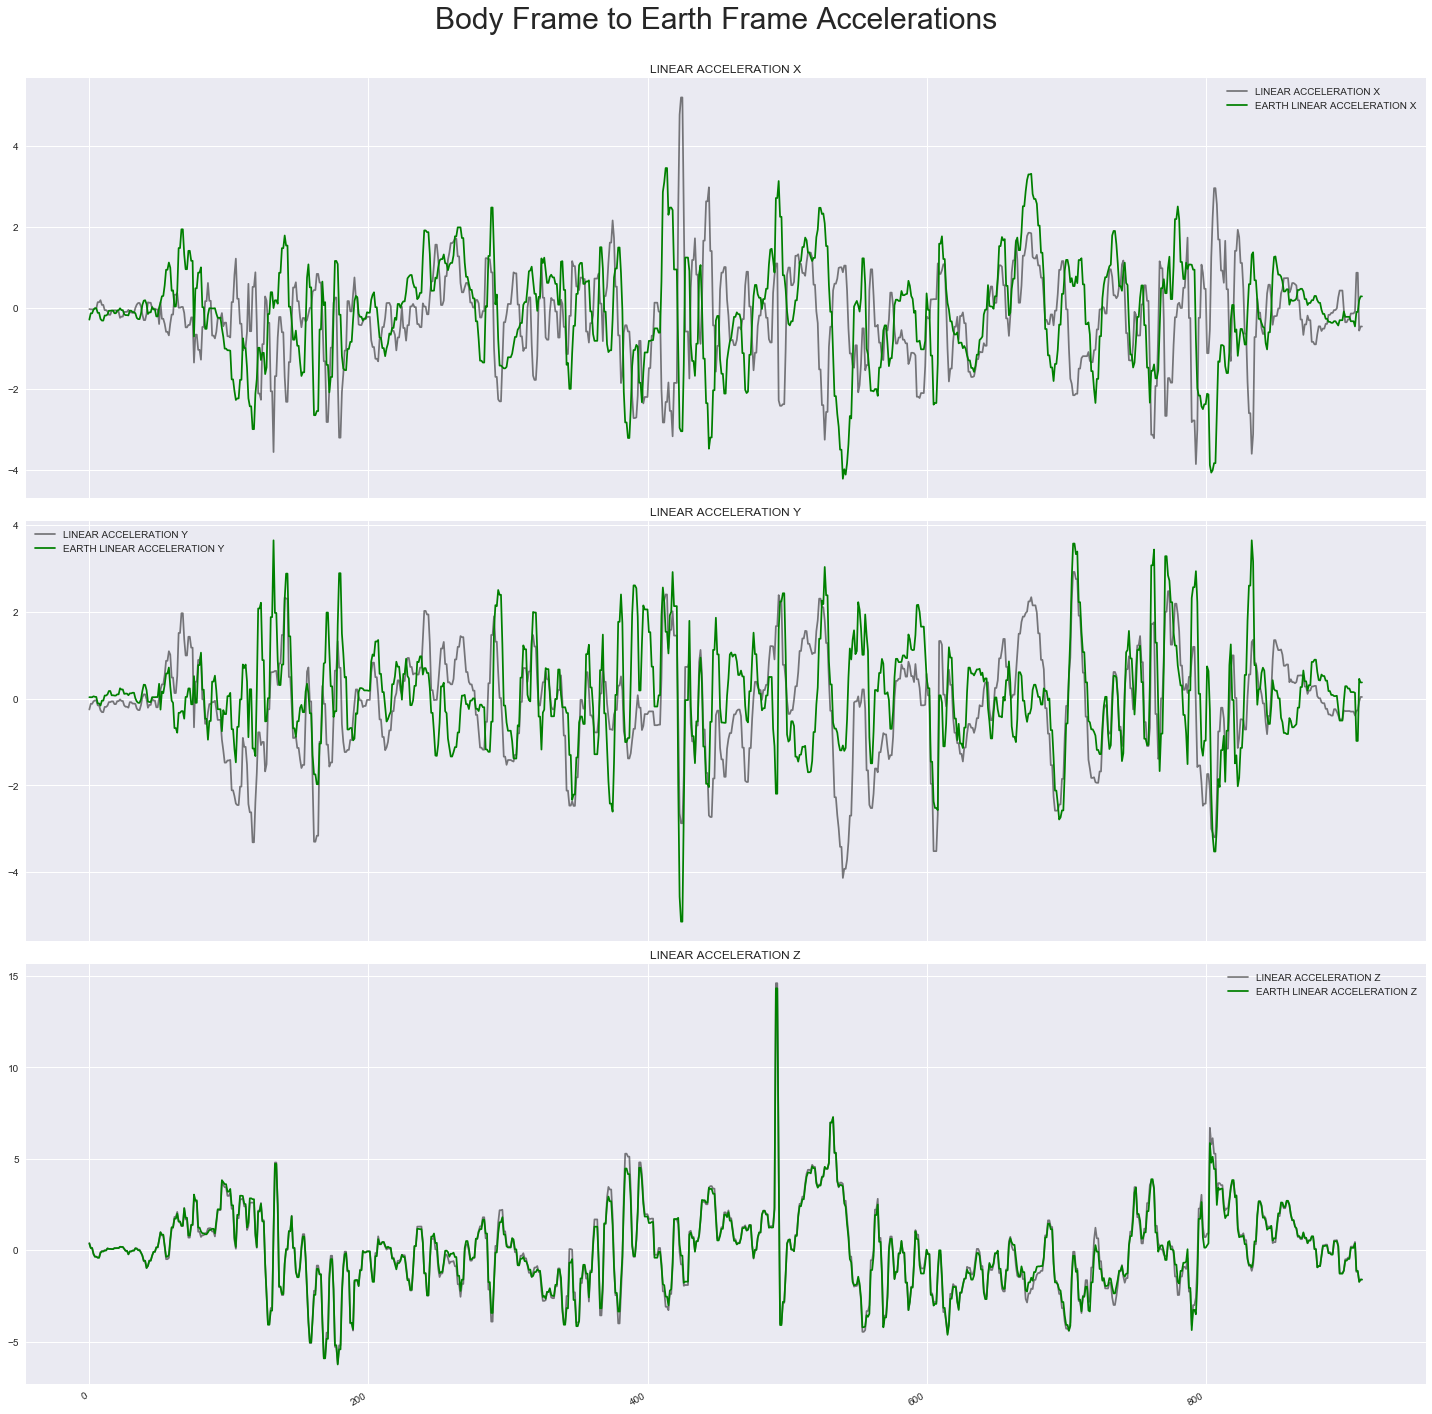

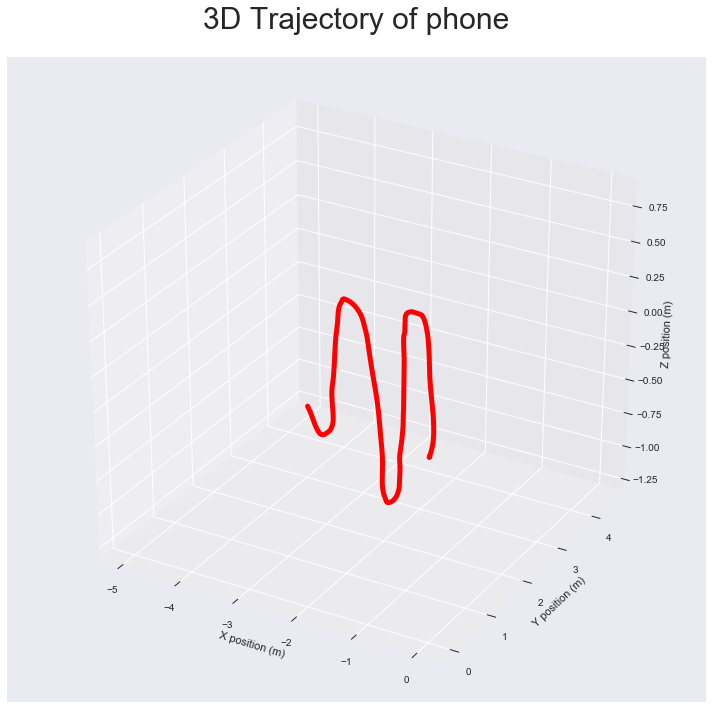

In [9]:
imu_tracking.visualize()

In [69]:
from datetime import datetime, date

timestamp1 = float(1598429505169)
timestamp2 = 1598429505358

print(timestamp1)

timestamp1 = datetime.fromtimestamp(timestamp1/1000.0)
timestamp2 = datetime.fromtimestamp(timestamp2/1000.0)

print(timestamp1)
print(timestamp2)

subs = timestamp2 - timestamp1

print(subs)

millisecond = subs.total_seconds()
t = millisecond*2

print(millisecond)
print(t)

1598429505169.0
2020-08-26 17:11:45.169000
2020-08-26 17:11:45.358000
0:00:00.189000
0.189
0.378


In [64]:
import time

ts = int(round(time.time() * 1000))
print(ts)

1598431877121
